# CHATBOTS - Using Natural Language Processing and Tensorflow

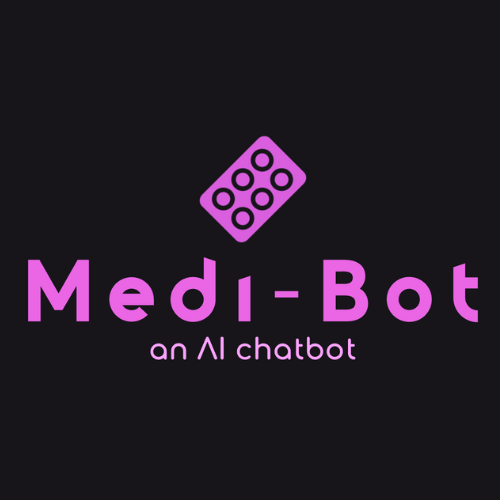

In [23]:
from IPython.core.display import Image, display
display(Image('medi-bot.png'))

In [24]:
pip install tflearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#Used in Tensorflow Model
import numpy as np
import tensorflow as tf
import tflearn
import random

#Usde to for Contextualisation and Other NLP Tasks.
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#Other
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

In [27]:
print("Processing the Intents.....")
with open('intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

classifier = Sequential()

In [29]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
words = []
classes = []
documents = []
ignore_words = ['?']
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......


In [32]:
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Lowering and Removing Duplicates.......
45 documents
7 classes ['Azithromycin', 'Cetrazine', 'Nimesulide', 'Paracetemol', 'goodbye', 'greeting', 'thanks']
63 unique stemmed words ['!', "'s", 'ach', 'aft', 'am', 'and', 'ant', 'anyon', 'ar', 'azax', 'azithromycin', 'back', 'biot', 'body', 'bye', 'cetrazin', 'cold', 'cpm', 'day', 'effect', 'fev', 'good', 'goodby', 'hav', 'hello', 'help', 'hey', 'hi', 'high', 'how', 'i', 'in', 'infect', 'is', 'joint', 'lat', 'leg', 'my', 'nimesulid', 'nos', 'of', 'pain', 'paracetemol', 'runny', 'see', 'sens', 'sid', 'sin', 'sneez', 'sor', 'temp', 'thank', 'that', 'ther', 'throat', 'tingl', 'tir', 'up', 'warm', 'what', 'work', 'yo', 'you']


In [33]:
print("Creating the Data for our Model.....")
training = []
output = []
print("Creating an List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Traning Set, Bag of Words for our Model....")
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

Creating the Data for our Model.....
Creating an List (Empty) for Output.....
Creating Traning Set, Bag of Words for our Model....


In [34]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)

print("Creating Train and Test Lists.....")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Building Neural Network for Out Chatbot to be Contextual....")
print("Resetting graph data....")
tf.reset_default_graph()

Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Train and Test Lists.....
Building Neural Network for Out Chatbot to be Contextual....
Resetting graph data....


In [35]:
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")

Training....


In [36]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [37]:
print("Training the Model.......")
model.fit(train_x, train_y, n_epoch=1000, batch_size=8, show_metric=True)
print("Saving the Model.......")
model.save('model.tflearn')


Training Step: 5999  | total loss: 0.85422 | time: 0.074s
| Adam | epoch: 1000 | loss: 0.85422 - acc: 0.9248 -- iter: 40/45
Training Step: 6000  | total loss: 0.85422 | time: 0.085s
| Adam | epoch: 1000 | loss: 0.85422 - acc: 0.9323 -- iter: 45/45
--
Saving the Model.......


In [38]:
print("Pickle is also Saved..........")
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Pickle is also Saved..........


In [39]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('intents.json') as json_data:
    intents = json.load(json_data)
    
print("Loading the Model......")
# load our saved model
model.load('./model.tflearn')

Loading Pickle.....
Loading the Model......


In [41]:
def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.25
print("ERROR_THRESHOLD = 0.25")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.25


Execution


In [ ]:
while True:
    input_data = input("You: ")
    answer = response(input_data)
    answer

You: hi
Hi there, how can I help?
You: i have fever
It seems like you are using paracetemol. Some common side effects are allergic reaction, low blood pressure,fast heart beat. If you notice any of the following symptoms, don't hesitate to seek medical attention.
You: i might have cold
It's possible that you are taking Cetrazine, which can cause side effects such as sore throat, dry mouth, headache, dizziness, and diarrhea. If these symptoms are causing you discomfort, it's important to seek medical help.
